<a href="https://colab.research.google.com/github/Noob919/Python_Basic/blob/main/modified_per_DTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("/content/MODIFIED PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)
df_res =  df_na[['time', 'tem', 'heating rate', 'Weight loss']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root']) 
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG ']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG ']

In [3]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(8, activation="sigmoid"),
        layers.Dense(1),
    ]
) 
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4) 

Epoch 1/50
193/193 [==============================] - 2s 4ms/step - loss: 0.0021 - root_mean_squared_error: 0.0457 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0909
Epoch 2/50
193/193 [==============================] - 1s 3ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834
Epoch 3/50
193/193 [==============================] - 1s 3ms/step - loss: 6.7313e-04 - root_mean_squared_error: 0.0259 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0692
Epoch 4/50
193/193 [==============================] - 1s 3ms/step - loss: 4.5150e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0591
Epoch 5/50
193/193 [==============================] - 1s 4ms/step - loss: 3.0398e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0547
Epoch 6/50
193/193 [==============================] - 1s 4ms/step - loss: 2.2159e-04 - root_mean_squared_error: 0.0149 - val_los

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 24        
                                                                 
 dense_2 (Dense)             (None, 8)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [5]:
met_df  = pd.DataFrame(model.history.history)

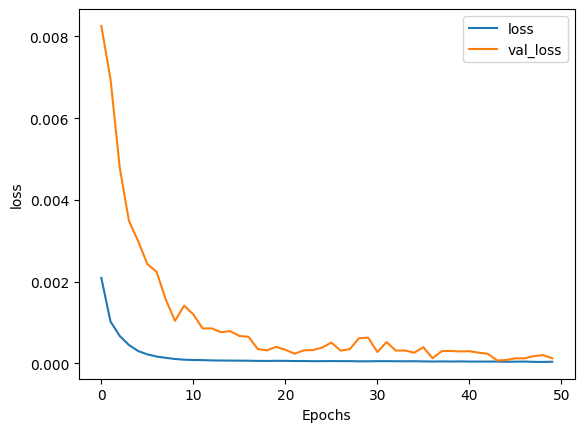

In [6]:
plt.plot(met_df['loss'], label = 'loss')
plt.plot(met_df['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

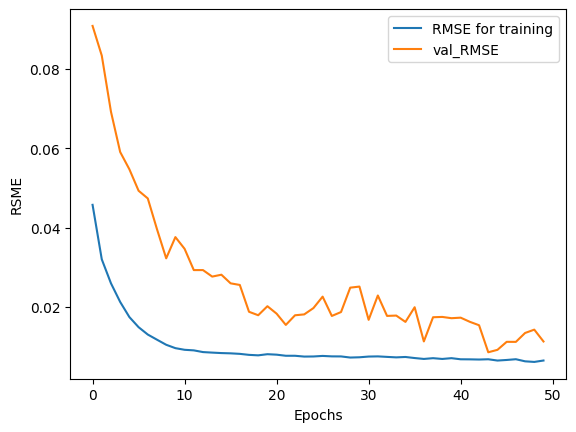

In [7]:
plt.plot(met_df['root_mean_squared_error'], label = 'RMSE for training')
plt.plot(met_df['val_root_mean_squared_error'], label = 'val_RMSE')
plt.xlabel('Epochs')
plt.ylabel('RSME')
plt.legend()

In [8]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG ']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val) 
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 3ms/step


,time,tem,heating rate,preditions,DTG
0,0.000015,0.066503,0.997547,0.038730,0.021829
1,0.000410,0.342108,0.933021,0.104696,0.111508
2,0.001133,0.536705,0.825700,0.164913,0.173681
3,0.001691,0.627016,0.752419,0.192601,0.201777
4,0.002062,0.672531,0.707928,0.208120,0.215722
...,...,...,...,...,...
401,0.069025,0.994999,0.014925,0.075497,0.070636
402,0.069028,0.995000,0.014921,0.075486,0.070621
403,0.069059,0.995002,0.014903,0.075385,0.070565
404,0.069069,0.995003,0.014895,0.075351,0.070540


In [9]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 6.745026040956761e-05
RMSE 0.008212810749650062
MAE 0.0065847221374050885
R2_Score 0.9833987511972195


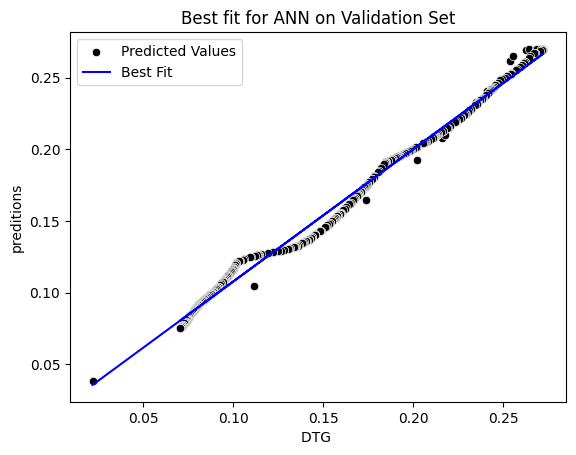

In [10]:
x = final_df['DTG ']
y = final_df['preditions']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df, x='DTG ', y='preditions', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='blue', label = 'Best Fit') 
plt.title('Best fit for ANN on Validation Set')
plt.legend()

In [11]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG ']

predictions = model.predict(X_test)  
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 2ms/step
MSE 7.187804803104312e-05
RMSE 0.008478092240064572
MAE 0.006880299385998134
R2_Score 0.9826324253984473


In [12]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,9.121918e-07,0.016664,0.999846,0.029317,0.005473
1,7.291845e-05,0.148165,0.987769,0.055757,0.048564
2,1.283030e-04,0.195713,0.978567,0.066613,0.064056
3,3.428455e-04,0.314557,0.943672,0.096964,0.102649
4,5.191274e-04,0.381633,0.915920,0.116285,0.124281
...,...,...,...,...,...
401,6.883534e-02,0.994973,0.015075,0.076165,0.071153
402,6.896480e-02,0.994992,0.014970,0.075704,0.070787
403,6.897134e-02,0.994992,0.014966,0.075684,0.070776
404,6.897715e-02,0.994993,0.014962,0.075665,0.070764


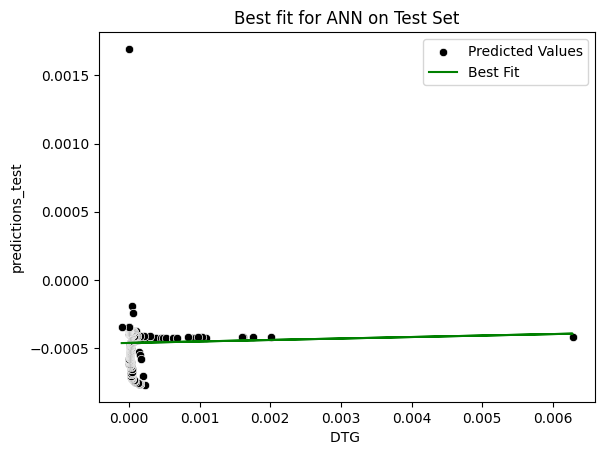

In [ ]:
x = final_df_test['DTG ']
y = final_df_test['predictions_test']
a,b = np.polyfit(x,y,1)
sns.scatterplot(data=final_df_test, x='DTG ', y='predictions_test', color='black', label='Predicted Values')
plt.plot(x, a*x+b, color='green', label = 'Best Fit') 
plt.title('Best fit for ANN on Test Set')
plt.legend()

In [ ]:
from tensorflow.keras.utils import plot_model

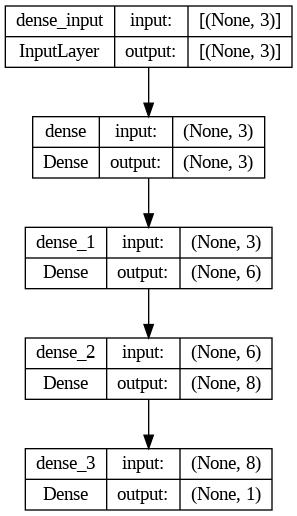

In [ ]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)